In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importing the built-in libraries
import seaborn as sb
%matplotlib inline

In [2]:
df=pd.read_csv("G:/DataFrames/Information.csv",engine='python')    # Reading the dataframe
df.head(5)

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3    10/26/15 23:24   
1  815719227    False   finalized                   3    10/26/15 23:30   
2  815719228    False   finalized                   3    10/26/15 23:33   
3  815719229    False   finalized                   3    10/26/15 23:10   
4  815719230    False   finalized                   3     10/27/15 1:15   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes                    1.0   

          created  ...                                       profileimage  \
0    12/5/13 1:48  ...  https://pbs.twimg.com/profile_images/414342229...   
1   10/1/12 13:51  ...  https://pbs.twimg.com/profile_images/539604221...   
2  11/28/14 11:30  ...  https://pbs.twimg.com/profile_images/657330418...   
3   6/11/09 22:39  ...  https://pbs.twimg.com/profile_images/259703936...   
4   4/16/14 13:23  ...  https://pbs.twimg.com/profile_images/564094871...   

   retweet_count sidebar_color  \
0              0        FFFFFF   
1              0        C0DEED   
2              1        C0DEED   
3              0        C0DEED   
4              0             0   

                                                text tweet_coord tweet_count  \
0  Robbie E Responds To Critics After Win Against...         NaN      110964   
1  ‰ÛÏIt felt like they were my friends and I was...         NaN        7471   
2  i absolutely adore when louis starts the songs...         NaN        5617   
3  Hi @JordanSpieth - Looking at the url - do you...         NaN        1693   
4  Watching Neighbours on Sky+ catching up with t...         NaN       31462   

    tweet_created      tweet_id   tweet_location               user_timezone  
0  10/26/15 12:40  6.587300e+17  main; @Kan1shk3                     Chennai  
1  10/26/15 12:40  6.587300e+17              NaN  Eastern Time (US & Canada)  
2  10/26/15 12:40  6.587300e+17           clcncl                    Belgrade  
3  10/26/15 12:40  6.587300e+17    Palo Alto, CA  Pacific Time (US & Canada)  
4  10/26/15 12:40  6.587300e+17              NaN                         NaN  

[5 rows x 26 columns]

# EXPLORATORY DATA ANALYSIS

In [3]:
df.duplicated().sum()     # finding the duplicates

0

In [4]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
# dropping columns which are not required


df.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',  'profile_yn','profile_yn:confidence', 
        'created', 'fav_number','gender_gold', 'link_color', 'name', 
        'profile_yn_gold', 'profileimage','retweet_count', 'sidebar_color',  'tweet_coord', 
        'tweet_count','tweet_created', 'tweet_id','tweet_location','user_timezone'],
        inplace=True,axis=1)
df.head(5)    

gender  gender:confidence  \
0    male             1.0000   
1    male             1.0000   
2    male             0.6625   
3    male             1.0000   
4  female             1.0000   

                                         description  \
0                              i sing my own rhythm.   
1  I'm the author of novels filled with family dr...   
2                louis whining and squealing and all   
3  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   

                                                text  
0  Robbie E Responds To Critics After Win Against...  
1  ‰ÛÏIt felt like they were my friends and I was...  
2  i absolutely adore when louis starts the songs...  
3  Hi @JordanSpieth - Looking at the url - do you...  
4  Watching Neighbours on Sky+ catching up with t...

In [6]:
df.isnull().sum()         # Calculating null values

gender                 97
gender:confidence      26
description          3744
text                    0
dtype: int64

In [7]:
df.dropna(subset=['gender'],inplace=True)          # Dropping nulls

In [8]:
df.isnull().sum()

gender                  0
gender:confidence       0
description          3729
text                    0
dtype: int64

In [9]:
df['description']=df.description.fillna("None")

In [10]:
df.isnull().sum()

gender               0
gender:confidence    0
description          0
text                 0
dtype: int64

In [11]:
df=df[df['gender:confidence']==1]  # Taking the rows which are 100% confident about gender

In [12]:
df.drop(columns=['gender:confidence'],inplace=True,axis=1)

In [13]:
df.shape[0]

13926

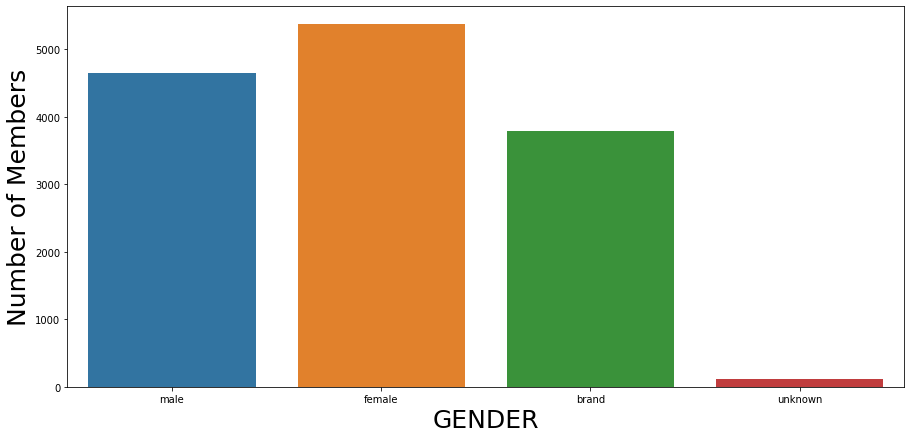

In [14]:
plt.figure(figsize=(15,7))
sb.countplot(x='gender',data=df)                       # VISUALIZATION OF GENDER
plt.xlabel("GENDER",fontsize=25)
plt.ylabel("Number of Members",fontsize=25)
plt.show()

In [15]:
df=df[df['gender']!='unknown']   # Dropping rows with unknown gender

In [16]:
df['gender'].value_counts()      # Calculating the count of each gender

female    5367
male      4653
brand     3784
Name: gender, dtype: int64

In [17]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize       # importing nltk library
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [18]:
list_of_stopwords=list(stopwords.words('english'))         # calculating stopwords

In [19]:
def clean(text):
    text=re.sub("<[^>]*>"," ",text)                      #remove html
    text=re.sub("https?://[A-Za-z0-9./]+"," ",text)      #remove url
    text=re.sub("@[A-Za-z0-9_]+"," ",text)              #remove tags          
    text=re.sub("#[A-Za-z0-9_]+"," ",text)               #remove hashtags
    text=re.sub("_+"," ",text)                           #remove underscore 
    text=re.sub("[^a-zA-z]"," ",text)                    #remove symbols and digits
    text=text.lower()                                   #converting to lowercase
    word_list=word_tokenize(text)
    clean_words=[word for word in word_list if not word in list_of_stopwords ]
    text=" ".join(clean_words) 
    return text

In [20]:
df['clean_text']=df['text'].apply(lambda x: clean(x))      # cleaning the text data 
df['clean_description']=df['description'].apply(lambda x: clean(x))   # cleaning the description data

# Here Feature Engineering is achieved which means creation of new columns from existing columns

In [21]:
df

gender                                        description  \
0        male                              i sing my own rhythm.   
1        male  I'm the author of novels filled with family dr...   
3        male  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      female  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
5      female                                 you don't know me.   
...       ...                                                ...   
20044  female                       I Love Me...Myself....&....I   
20045  female                                               (rp)   
20046    male  Whatever you like, it's not a problem at all. ...   
20047    male  #TeamBarcelona ..You look lost so you should f...   
20049  female                     Teamwork makes the dream work.   

                                                    text  \
0      Robbie E Responds To Critics After Win Against...   
1      ‰ÛÏIt felt like they were my friends and I was...   
3      Hi @JordanSpieth - Looking at the url - do you...   
4      Watching Neighbours on Sky+ catching up with t...   
5      Ive seen people on the train with lamps, chair...   
...                                                  ...   
20044  Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...   
20045  @lookupondeath ...Fine, and I'll drink tea too...   
20046  Greg Hardy you a good player and all but don't...   
20047  You can miss people and still never want to se...   
20049  I think for my APUSH creative project I'm goin...   

                                              clean_text  \
0            robbie e responds critics win eddie edwards   
1                         felt like friends living story   
3         hi looking url use typically see advanced user   
4       watching neighbours sky catching neighbs xxx xxx   
5             ive seen people train lamps chairs tvs etc   
...                                                  ...   
20044           need ride home practice raining hard asf   
20045                                fine drink tea love   
20046  greg hardy good player get face dez bryant lea...   
20047                   miss people still never want see   
20049  think apush creative project going bring bacon...   

                                       clean_description  
0                                            sing rhythm  
1              author novels filled family drama romance  
3      mobile guy ers shazam google kleiner perkins y...  
4      ricky wilson best frontman kaiser chiefs best ...  
5                                                   know  
...                                                  ...  
20044                                               love  
20045                                                 rp  
20046                              whatever like problem  
20047          look lost follow follow heart bring brain  
20049                          teamwork makes dream work  

[13804 rows x 5 columns]

# Question - 1 :
# What are the most common emotions/words used by Males and Females?

In [22]:
df1=df[(df['gender']=='male') | (df['gender']=='female')]   # Taking only male & female genders

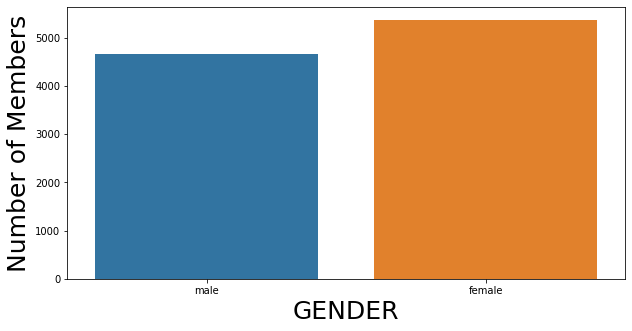

In [23]:
plt.figure(figsize=(10,5))
sb.countplot(x='gender',data=df1)
plt.xlabel("GENDER",fontsize=25)
plt.ylabel("Number of Members",fontsize=25)
plt.show()

In [24]:
df1['gender'].value_counts()

female    5367
male      4653
Name: gender, dtype: int64

In [25]:
male_df=df1[df1['gender']=='male']     # Taking all the males into one dataframe
male_df                                

gender                                        description  \
0       male                              i sing my own rhythm.   
1       male  I'm the author of novels filled with family dr...   
3       male  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
7       male    The secret of getting ahead is getting started.   
17      male  Over enthusiastic F1 fan.  Model collector, mu...   
...      ...                                                ...   
20032   male  Amicable IT person. Self indulgent writer. Som...   
20037   male  Typographer and typographic consultant, co-fou...   
20043   male  Head Chef, Chez Bruce. Loves Cars and Bicycles...   
20046   male  Whatever you like, it's not a problem at all. ...   
20047   male  #TeamBarcelona ..You look lost so you should f...   

                                                    text  \
0      Robbie E Responds To Critics After Win Against...   
1      ‰ÛÏIt felt like they were my friends and I was...   
3      Hi @JordanSpieth - Looking at the url - do you...   
7      Gala Bingo clubs bought for å£241m: The UK's l...   
17     @coolyazzy94 Ditto - I'm still learning the fa...   
...                                                  ...   
20032  @legobutts you can do quests and kill stuff wh...   
20037  @TrentWalton @oguzbilgic Spell it out in all-c...   
20043  Game faggot and venison loin, crisp spelt and ...   
20046  Greg Hardy you a good player and all but don't...   
20047  You can miss people and still never want to se...   

                                              clean_text  \
0            robbie e responds critics win eddie edwards   
1                         felt like friends living story   
3         hi looking url use typically see advanced user   
7      gala bingo clubs bought uk largest high street...   
17     ditto still learning favourites retweet stuff ...   
...                                                  ...   
20032  quests kill stuff wearing mask get candy use g...   
20037  spell caps think may candidate new unicode cha...   
20043        game faggot venison loin crisp spelt quince   
20046  greg hardy good player get face dez bryant lea...   
20047                   miss people still never want see   

                                       clean_description  
0                                            sing rhythm  
1              author novels filled family drama romance  
3      mobile guy ers shazam google kleiner perkins y...  
7                   secret getting ahead getting started  
17     enthusiastic f fan model collector music fan f...  
...                                                  ...  
20032  amicable person self indulgent writer somehow ...  
20037  typographer typographic consultant co founder ...  
20043      head chef chez bruce loves cars bicycles food  
20046                              whatever like problem  
20047          look lost follow follow heart bring brain  

[4653 rows x 5 columns]

In [26]:
most_common_words_male=[]
msgs=list(male_df['clean_text'])              # calculating most common words by males 
for msg in msgs: 
    word_tokens=word_tokenize(msg)
    for word in word_tokens:
        most_common_words_male.append(word)

In [27]:
data=pd.Series(most_common_words_male)

In [28]:
count=data.value_counts()

In [29]:
male_data_frame=pd.DataFrame(count,columns=['Number of Times Occured'])

In [30]:
male_data_frame[:5]

Number of Times Occured
like                      271
get                       259
one                       194
time                      182
new                       165

In [31]:
words=list(male_data_frame.index)
noto=list(male_data_frame['Number of Times Occured'])

# Most common words by males :

In [32]:
mw_df=pd.DataFrame({'Word':words,'Occurrence':noto})
mw_df[:10]

Word  Occurrence
0    like         271
1     get         259
2     one         194
3    time         182
4     new         165
5      go         154
6  people         153
7    love         148
8     got         145
9    good         142

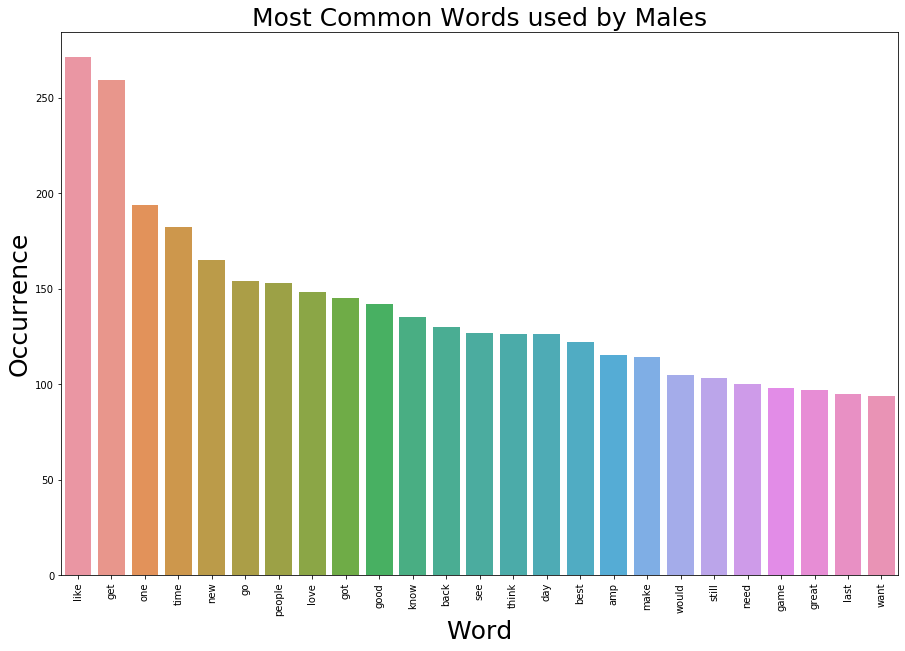

In [33]:
          # VISUALIZATION OF MOST COMMON WORDS OF MALES


plt.figure(figsize=(15,10))                               
x=range(25)
sb.barplot(x=mw_df['Word'].head(25),y=mw_df['Occurrence'].head(25))
plt.xticks(x,mw_df['Word'].head(25),rotation=90)
plt.xlabel('Word',fontsize=25)
plt.ylabel('Occurrence',fontsize=25)
plt.title("Most Common Words used by Males",fontsize=25)
plt.show()

In [34]:
female_df=df[df['gender']=='female']     # Taking all females into one dataframe
female_df

gender                                        description  \
4      female  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
5      female                                 you don't know me.   
8      female         Pll Fan // Crazy about MCD // Ramen is bae   
9      female  Renaissance art historian, University of Notti...   
15     female                                               None   
...       ...                                                ...   
20035  female  25. love my friends & family. the color pink. ...   
20039  female          You can find me where the wild things are   
20044  female                       I Love Me...Myself....&....I   
20045  female                                               (rp)   
20049  female                     Teamwork makes the dream work.   

                                                    text  \
4      Watching Neighbours on Sky+ catching up with t...   
5      Ive seen people on the train with lamps, chair...   
8      @_Aphmau_ the pic defines all mcd fangirls/fan...   
9      @Evielady just how lovely is the tree this yea...   
15     https://t.co/EROGWTFTYo It's a glow of satisfa...   
...                                                  ...   
20035  Beetlejuice is the perfect Halloween movie!!!!...   
20039  Especially when all you do is the best you can...   
20044  Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...   
20045  @lookupondeath ...Fine, and I'll drink tea too...   
20049  I think for my APUSH creative project I'm goin...   

                                              clean_text  \
4       watching neighbours sky catching neighbs xxx xxx   
5             ive seen people train lamps chairs tvs etc   
8       pic defines mcd fangirls fanboys mcd shippers xd   
9                   lovely tree year never seen gorgeous   
15                                glow satisfaction glow   
...                                                  ...   
20035                beetlejuice perfect halloween movie   
20039                     especially best still get shit   
20044           need ride home practice raining hard asf   
20045                                fine drink tea love   
20049  think apush creative project going bring bacon...   

                                       clean_description  
4      ricky wilson best frontman kaiser chiefs best ...  
5                                                   know  
8                            pll fan crazy mcd ramen bae  
9      renaissance art historian university nottingha...  
15                                                  none  
...                                                  ...  
20035       love friends family color pink mkto followed  
20039                                   find wild things  
20044                                               love  
20045                                                 rp  
20049                          teamwork makes dream work  

[5367 rows x 5 columns]

In [35]:
most_common_words_female=[]
msgs=list(female_df['clean_text'])         # calculating most common words by females
for msg in msgs:
    word_tokens=word_tokenize(msg)
    for word in word_tokens:
        most_common_words_female.append(word)

In [36]:
data=pd.Series(most_common_words_female)

In [37]:
count=data.value_counts()

In [38]:
female_data_frame=pd.DataFrame(count,columns=['Number of Times Occured'])

In [39]:
female_data_frame[:5]

Number of Times Occured
like                      358
get                       303
one                       263
day                       254
love                      245

In [40]:
words=list(female_data_frame.index)
noto=list(female_data_frame['Number of Times Occured'])

# Most common words by females :

In [41]:
fw_df=pd.DataFrame({'Word':words,'Occurrence':noto})
fw_df[:10]

Word  Occurrence
0    like         358
1     get         303
2     one         263
3     day         254
4    love         245
5      go         220
6  people         202
7    time         195
8     got         184
9    know         164

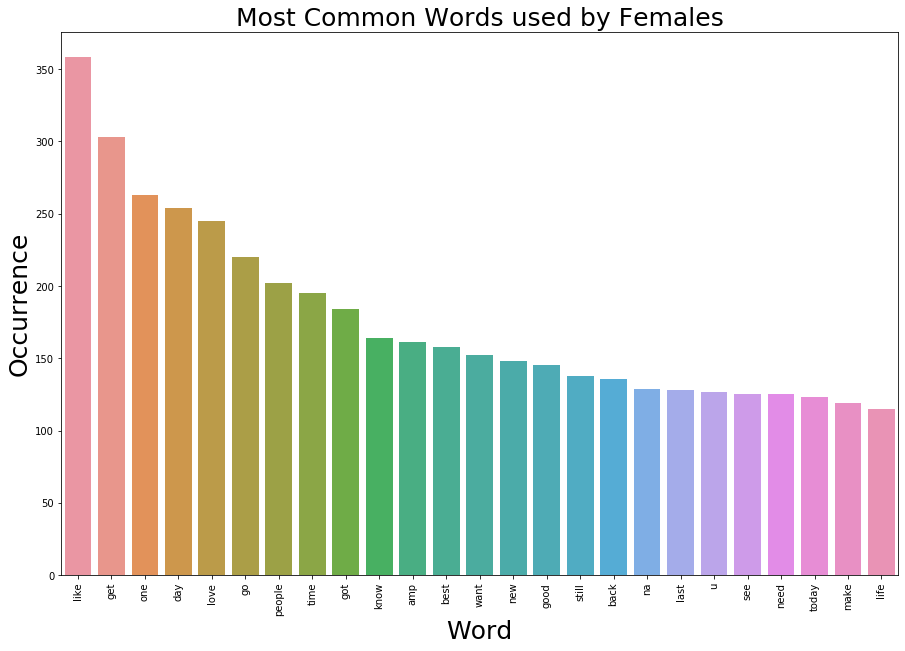

In [42]:
              # VISUALIZATION OF MOST COMMON WORDS BY FEMALES


plt.figure(figsize=(15,10))
x=range(25)
sb.barplot(x=fw_df['Word'].head(25),y=fw_df['Occurrence'].head(25))
plt.xticks(x,fw_df['Word'].head(25),rotation=90)
plt.xlabel('Word',fontsize=25)
plt.ylabel('Occurrence',fontsize=25)
plt.title("Most Common Words used by Females",fontsize=25)
plt.show()

# Question - 2 :
# Which gender makes more typos in their tweets?

In [43]:
           # Checking the misspelt words by males and females


from spellchecker import SpellChecker
spell=SpellChecker()
male_misspell=spell.unknown(most_common_words_male)
female_misspell=spell.unknown(most_common_words_female)

In [44]:
len(male_misspell)

1569

In [45]:
male_misspell

{'bummed',
 'meraviglioso',
 'mobius',
 'tabback',
 'mosh',
 'umair',
 'rdu',
 'wifi',
 'cristain',
 'throated',
 'atl',
 'preferrably',
 'raheel',
 'bih',
 'epollo',
 'herbalife',
 'ramires',
 'goodvibes',
 'glowforge',
 'futurama',
 'palantir',
 'talladega',
 'cnra',
 'rendez',
 'chalene',
 'everyones',
 'welfer',
 'bhaijaan',
 'uploading',
 'happpy',
 'unke',
 'obama',
 'cuz',
 'econo',
 'mmmmmm',
 'alleynyc',
 'aprox',
 'fruited',
 'ssx',
 'boof',
 'woow',
 'housingwire',
 'acct',
 'shauna',
 'ik',
 'kook',
 'lolz',
 'wrs',
 'pba',
 'conf',
 'dre',
 'steinem',
 'retweeted',
 'laidat',
 'alfy',
 'joost',
 'anythingrelated',
 'dav',
 'tweeted',
 'bajrangi',
 'powah',
 'obamacare',
 'msb',
 'humbleness',
 'futrell',
 'sixers',
 'credlin',
 'instalm',
 'kvetching',
 'njoy',
 'bresy',
 'motogp',
 'ingnashov',
 'soderling',
 'bochellie',
 'lmao',
 'dweeb',
 'uhhhh',
 'rih',
 'saied',
 'oomf',
 'drogba',
 'downloads',
 'skeyt',
 'tengo',
 'sissies',
 'obtaine',
 'mbp',
 'mslsd',
 'consol'

## Number of typos by males : 1569

In [46]:
len(female_misspell)

1670

In [47]:
female_misspell

{'bummed',
 'fml',
 'fclifn',
 'olamide',
 'mosh',
 'shoulda',
 'mcmenamins',
 'gradebook',
 'wifi',
 'mych',
 'kpop',
 'uppercase',
 'tabibastyles',
 'edu',
 'bih',
 'srsly',
 'peanutbutter',
 'knobhead',
 'unkillables',
 'kdy',
 'katniss',
 'findworkaustin',
 'michone',
 'goodvibes',
 'alkire',
 'gurinder',
 'talladega',
 'warefare',
 'rendez',
 'mulaaaaaa',
 'kochi',
 'ayo',
 'involucre',
 'bhaijaan',
 'woah',
 'lolisa',
 'gluta',
 'uploading',
 'obama',
 'cuz',
 'vlooger',
 'sundae',
 'preciate',
 'garbear',
 'ocd',
 'prepped',
 'dongyan',
 'adeles',
 'vouge',
 'lollypops',
 'pedaling',
 'gta',
 'shauna',
 'seo',
 'yezzy',
 'bachelorettes',
 'ik',
 'evanescence',
 'asssss',
 'gwp',
 'retweeted',
 'heartbreaks',
 'fleetwoods',
 'onedirection',
 'uhhh',
 'mua',
 'yaaaaaaaa',
 'crankiest',
 'hbc',
 'afnxwkg',
 'tweeted',
 'bajrangi',
 'victorias',
 'adulting',
 'fuk',
 'needa',
 'ragsdale',
 'adderall',
 'puffle',
 'bnntv',
 'geopolitcs',
 'htining',
 'primegf',
 'glassmasters',
 'sla

## Number of typos by females : 1670 

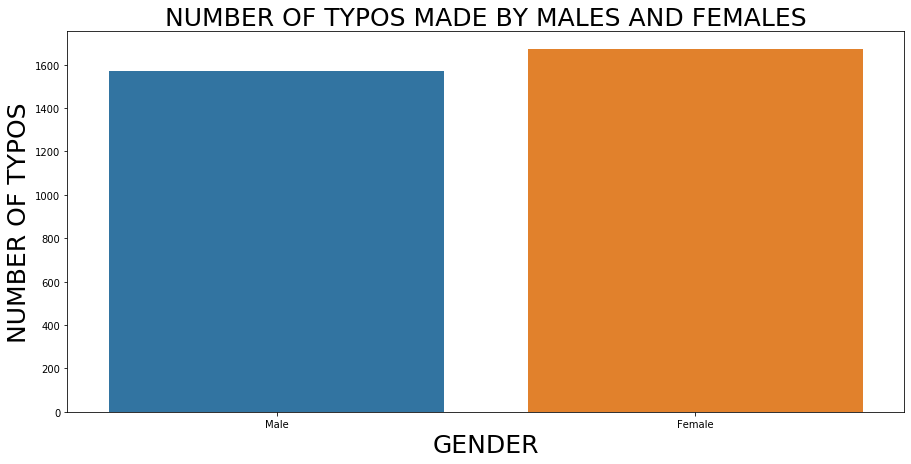

In [48]:
            # VISUALIZATION OF TYPOS


plt.figure(figsize=(15,7))
Gender=['Male','Female']
Misspell_Count=[len(male_misspell),len(female_misspell)]
sb.barplot(x=Gender,y=Misspell_Count)
plt.xlabel('GENDER',fontsize=25)
plt.ylabel('NUMBER OF TYPOS',fontsize=25)
plt.title('NUMBER OF TYPOS MADE BY MALES AND FEMALES',fontsize=25)
plt.show()

# So, Females made more typos than Males.

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()                            # Encoding gender variable
y=labelencoder.fit_transform(df['gender'])

# Extracting all the Text into one separate feature. This comes under Feature Engineering as well as Feature Selection. 

# Feature Selection - Selecting the correct columns i.e. Text & Description

# Feature Engineering - Creating the new column which includes both text data and description data

In [50]:
df['Total_text_info']=df['clean_text'].str.cat(df['clean_description'], sep=' ')

# Lemmatizing the Text

In [51]:
lem=WordNetLemmatizer()

In [52]:
def lemmatizing(text):
    word_tokens=word_tokenize(text)
    lemmatized_words=[lem.lemmatize(word) for word in word_tokens]
    text=' '.join(lemmatized_words)
    return text

In [53]:
df['Lemmatized_Text']=df['Total_text_info'].apply(lambda x: lemmatizing(x))

In [54]:
df.head()

gender                                        description  \
0    male                              i sing my own rhythm.   
1    male  I'm the author of novels filled with family dr...   
3    male  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4  female  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
5  female                                 you don't know me.   

                                                text  \
0  Robbie E Responds To Critics After Win Against...   
1  ‰ÛÏIt felt like they were my friends and I was...   
3  Hi @JordanSpieth - Looking at the url - do you...   
4  Watching Neighbours on Sky+ catching up with t...   
5  Ive seen people on the train with lamps, chair...   

                                         clean_text  \
0       robbie e responds critics win eddie edwards   
1                    felt like friends living story   
3    hi looking url use typically see advanced user   
4  watching neighbours sky catching neighbs xxx xxx   
5        ive seen people train lamps chairs tvs etc   

                                   clean_description  \
0                                        sing rhythm   
1          author novels filled family drama romance   
3  mobile guy ers shazam google kleiner perkins y...   
4  ricky wilson best frontman kaiser chiefs best ...   
5                                               know   

                                     Total_text_info  \
0  robbie e responds critics win eddie edwards si...   
1  felt like friends living story author novels f...   
3  hi looking url use typically see advanced user...   
4  watching neighbours sky catching neighbs xxx x...   
5    ive seen people train lamps chairs tvs etc know   

                                     Lemmatized_Text  
0  robbie e responds critic win eddie edward sing...  
1  felt like friend living story author novel fil...  
3  hi looking url use typically see advanced user...  
4  watching neighbour sky catching neighbs xxx xx...  
5       ive seen people train lamp chair tv etc know

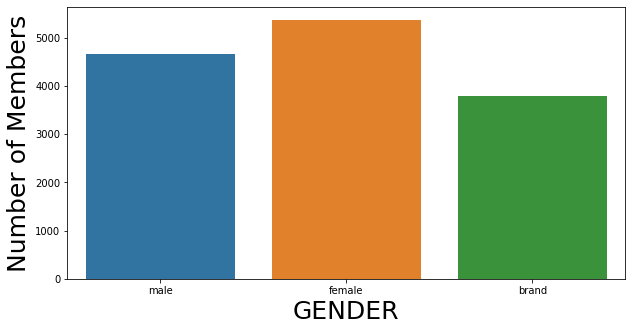

In [55]:
plt.figure(figsize=(10,5))
sb.countplot(x='gender',data=df)       # Checking whether data has 3 genders or not
plt.xlabel("GENDER",fontsize=25)
plt.ylabel("Number of Members",fontsize=25)
plt.show()

In [56]:
x=df['Lemmatized_Text']

# Splitting the data into Training and Testing sets

In [57]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Dependent Variable : GENDER
# Independent Variable : TEXT , DESCRIPTION 

# Building the MACHINE LEARNING models

# Implemented Cross-Validation also for training the model on whole data

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier    # Importing all Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [59]:
from sklearn import metrics

# 1. LOGISTIC REGRESSION

In [60]:
import warnings
warnings.filterwarnings('ignore')
logreg_model=make_pipeline(TfidfVectorizer(),LogisticRegression())
logreg_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercep

In [61]:
y_pred=logreg_model.predict(x_test)
print('Accuracy of Logistic Regression model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(logreg_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of Logistic Regression model is :  0.6544730170228178
Cross Validation Accuracy Scores :  [0.60992394 0.65773271 0.66896052 0.63093082 0.61847826]
Overall Accuracy :  0.6372052501456624


# 2. DECISION TREE

In [62]:
dectree_model=make_pipeline(TfidfVectorizer(),DecisionTreeClassifier())
dectree_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                 vocabulary=None)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, 

In [63]:
y_pred=dectree_model.predict(x_test)
print('Accuracy of Decision Tree model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(dectree_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of Decision Tree model is :  0.5613908004346251
Cross Validation Accuracy Scores :  [0.5088736  0.55161173 0.5671858  0.52372329 0.52246377]
Overall Accuracy :  0.5347716380853398


# 3. RANDOM FOREST

In [64]:
rf_model=make_pipeline(TfidfVectorizer(),RandomForestClassifier())
rf_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [65]:
y_pred=rf_model.predict(x_test)
print('Accuracy of Random Forest model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(rf_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of Random Forest model is :  0.6236870699022093
Cross Validation Accuracy Scores :  [0.58348424 0.64252083 0.63853676 0.59905831 0.58043478]
Overall Accuracy :  0.6088069854967482


# 4. K-NEAREST NEIGHBORS

In [66]:
knn_model=make_pipeline(TfidfVectorizer(),KNeighborsClassifier())
knn_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='mink

In [67]:
y_pred=knn_model.predict(x_test)
print('Accuracy of K-Nearest Neighbors model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(knn_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of K-Nearest Neighbors model is :  0.5519739224918507
Cross Validation Accuracy Scores :  [0.5088736  0.53567548 0.54943861 0.53132923 0.52536232]
Overall Accuracy :  0.530135846600423


# 5. SUPPORT VECTOR MACHINES

In [68]:
svm_model=make_pipeline(TfidfVectorizer(),SVC())
svm_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape=

In [69]:
y_pred=svm_model.predict(x_test)
print('Accuracy of Support Vector Machines model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(svm_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of Support Vector Machines model is :  0.6508511408909815
Cross Validation Accuracy Scores :  [0.62332488 0.6667874  0.66244114 0.62513582 0.61014493]
Overall Accuracy :  0.637566834112824


# 6. NAIVE BAYES

In [70]:
nb_model=make_pipeline(TfidfVectorizer(),MultinomialNB())
nb_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [71]:
y_pred=nb_model.predict(x_test)
print('Accuracy of Naive-Bayes Classifier model is : ',metrics.accuracy_score(y_pred,y_test))
cv_array=cross_val_score(nb_model,x,y,cv=5)
print('Cross Validation Accuracy Scores : ',cv_array)
print('Overall Accuracy : ',(sum(cv_array))/5)

Accuracy of Naive-Bayes Classifier model is :  0.6388989496559218
Cross Validation Accuracy Scores :  [0.60557769 0.65809489 0.64831583 0.59797175 0.59927536]
Overall Accuracy :  0.6218471043362781


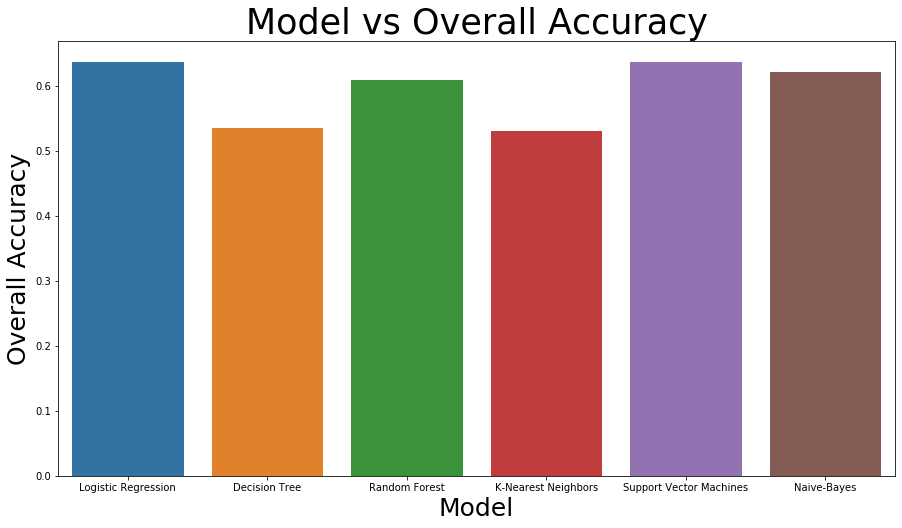

In [72]:
overall_accuracies=[0.6372052501456624, 0.5347716380853398, 0.6088069854967482, 0.530135846600423, 0.637566834112824, 0.6218471043362781]
models=['Logistic Regression','Decision Tree','Random Forest','K-Nearest Neighbors','Support Vector Machines','Naive-Bayes']
plt.figure(figsize=(15,8))
sb.barplot(x=models,y=overall_accuracies)
plt.xlabel('Model',fontsize=25)
plt.ylabel('Overall Accuracy',fontsize=25)
plt.title('Model vs Overall Accuracy',fontsize=35)
plt.show()

# From the above figure, we can see that SVM & Logistic Regression models have greater accuracy than other models of ~64%.

# ENSEMBLING LOGISTIC REGRESSION, SUPPORT VECTOR MACHINES & NAIVE-BAYES

In [73]:
from sklearn.ensemble import VotingClassifier
ensemble_model=VotingClassifier(estimators=[('Logistic Regression',logreg_model),("Support Vector Machine",svm_model),("Naive Bayes",nb_model)],voting='hard') 
ensemble_model.fit(x_train,y_train)
y_pred=ensemble_model.predict(x_test)
ensemble_accuracy=metrics.accuracy_score(y_test,y_pred)

In [74]:
ensemble_accuracy*=100
print('Accuracy of Ensembling model is ','%.2f'%ensemble_accuracy)

Accuracy of Ensembling model is  65.48


# Accuracy of Ensembling Model is 65.48 %

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [76]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 [[540 129 118]
 [ 59 822 179]
 [ 60 408 446]]


In [77]:
print("Classification Report\n",classification_report(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       787
           1       0.60      0.78      0.68      1060
           2       0.60      0.49      0.54       914

    accuracy                           0.65      2761
   macro avg       0.67      0.65      0.65      2761
weighted avg       0.66      0.65      0.65      2761

